## Module 3 Project - Linear Regression Applied to Classification Problem

### Executive Summary

This project explores the application of linear regression to a classification problem using the 'Car Evaluation' dataset from OpenML. The main objective is to investigate the feasibility of using linear regression in conjunction with one-hot encoded labels to perform classification. 

After preprocessing and encoding the dataset, a baseline linear regression model was trained and evaluated using standard classification metrics such as accuracy, precision, recall, and F1-score. To contextualize its performance, the results were compared with those of traditional classifiers including logistic regression (with ordinal encoding), Support Vector Machines (SVM), and Random Forest.

Our findings in this project indicate that linear regression with one-hot encoded labels can perform nearly as good as logistic regression and SVM, with test accuracy hovering around 83%, higher than 60% in  the project requirements. Later, we explored an ensembled model, Random Forest, which outperformed all other models, achieving perfect scores across all metrics. This highlights the advantage of ensemble methods, particularly their ability to model non-linear relationships and feature interactions that simpler models might miss.

#### 1. Scope of the Project

In this project, we are going to explore the application of linear regression, which is regularly used for continuous prediction but this time in the context of a classification problem. The model will be experimented using 'Car' OpenML Dataset. The objectives of this projects are:

 (1) Explore the method to transform categorical labels through one-hot encoding, train a linear regression model and interpret its outputs as class predictions using argmax function;

 (2) Evaluate the model's performance using standard classification metrics such as accuracy, precision, recall and etc.;

 (3) Compare it with more conventional classification algorithms like logistic regression, SVM and random forest;

 (4) Demonstrate both the capabilities and limitations of using regression models for classification tasks.

#### 2. Introduction of the One-hot Encoding For Classification

As discussed in Module 3 Lesson 1-2 [1]: "Linear Regression with an Indicator Matrix", in classification problems involving categorical target variables, it is essential to represent class labels in a form that preserves their categorical nature without introducing unintended ordinal relationships. One-hot encoding achieves this goal by converting each class label into a binary vector of length $K$, where $K$ is the number of distinct classes.

For a class label $y \in \{0, 1, \ldots, K-1\}$, the one-hot encoded vector $\mathbf{y}_{\text{one-hot}} \in \{0,1\}^K$ is defined as:

$$
\mathbf{y}_{\text{one-hot}} = [\mathbb{I}(y = 0),\ \mathbb{I}(y = 1),\ \ldots,\ \mathbb{I}(y = K-1)]
$$

where $\mathbb{I}(\cdot)$ is the indicator function.

This encoding allows classification algorithms (e.g., linear regression, softmax regression, neural networks and etc.) to treat each class as an independent category, enabling the model to learn separate decision boundaries without being misled by artificial ordering among the labels.

As mentioned in the Module 3 Lesson-1, consider an example where there are three categorical class labels: A, B, and C:

One-hot encoding transforms each class into a binary vector of length 3, where only the position corresponding to the class is marked with a 1, and the rest are 0:

$$
\begin{pmatrix}
\text{A} \\
\text{B} \\
\text{C}
\end{pmatrix}
\quad \Rightarrow \quad
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

This representation avoids introducing any artificial ordering among the labels and is suitable for feeding into classification models including the linear regression, which we will attempt in this project.



In [1]:
# Load standard packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix

In [2]:
# Load the dataset
data = fetch_openml(name='car', as_frame=True)
df = data.frame  # Save it to a panda dataframe

C:\Users\jacky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\datasets\_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name car exist. Versions may be fundamentally different, returning version 2. Available versions:
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=991
- version 3, status: active
  url: https://www.openml.org/search?type=data&id=40975

  warn(warning_msg)


#### 3. Description of the Dataset:

For this project, I selected the Car Evaluation dataset named 'car' (Car Evaluation) from UCI OpenML Repository. The dataset evaluates cars based on several categorical features such as:

Predictors:

(1) `buying`: Buying price of the car  
  - *Possible values*: `vhigh`, `high`, `med`, `low`

(2) `maint`: Maintenance cost of the car  
  - *Possible values*: `vhigh`, `high`, `med`, `low`

(3) `doors`: Number of doors  
  - *Possible values*: `2`, `3`, `4`, `5more`

(4) `persons`: Seating capacity (number of persons the car can carry)  
  - *Possible values*: `2`, `4`, `more`

(5) `lug_boot`: Size of the luggage boot  
  - *Possible values*: `small`, `med`, `big`

(6) `safety`: Safety level of the car  
  - *Possible values*: `low`, `med`, `high`

Outcome (Label):

(7) `binaryClass`: Acceptability of the car  
  - *Possible values*: `P`, `N`

In [3]:
# Inspect the dataset
print("Dataset shape:", df.shape)
print("First few rows of the dataset:")
print(df.head(5))

Dataset shape: (1728, 7)
First few rows of the dataset:
  buying  maint doors persons lug_boot safety binaryClass
0  vhigh  vhigh     2       2    small    low           P
1  vhigh  vhigh     2       2    small    med           P
2  vhigh  vhigh     2       2    small   high           P
3  vhigh  vhigh     2       2      med    low           P
4  vhigh  vhigh     2       2      med    med           P


#### 4. Data Pre-processing:

To apply the linear regression to the dataset with categorical variables, we need to transform them into numerical values using some encoding techniques. Ordinal encoding in our case is particularly suitable for the car evaluation dataset because the categorical features exhibit a clear and meaningful order (e.g. 'low', 'med', 'high', 'vhigh'). By explicitly definining the ordinal categories for each feaure, the encoding preserves the inherent ranking among the levels, allowing the linear regression to interpret and learn from the relative magnitudes. The overall data preprocessing will follow the sequence below:

-  Separate predictor variables and outcomes: X, y
-  Inspect the dataset to check if there are any missing values (Null Values) or outliers
-  Apply ordinal encoding to the predictor X
-  Inspect the dataset again after ordinal encoding
-  Apply one-hot encoding to the outcome y
-  Dataset splits into training, validation and testing parts

In [4]:
# Extract the features and target variable

# Features:
X = df.drop(columns=['binaryClass']) # Drop the target variable 'class'

# Target variable:
y = df['binaryClass'] # We'll process the target variable later.

In [5]:
# Inspect the Feature Set

# Check if there is any Null values in each column
print("(1) Check if there are any Null values in each column ? \n")
print(X.isnull().sum())

# Show first five rows of the feature set
print("\n(2) Here are the first five rows of the feature set:")
print("\n", X.head(5))


(1) Check if there are any Null values in each column ? 

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
dtype: int64

(2) Here are the first five rows of the feature set:

   buying  maint doors persons lug_boot safety
0  vhigh  vhigh     2       2    small    low
1  vhigh  vhigh     2       2    small    med
2  vhigh  vhigh     2       2    small   high
3  vhigh  vhigh     2       2      med    low
4  vhigh  vhigh     2       2      med    med


In [6]:
# Summary of the Feature Set
print("\n(3) Summary of the feature set :")
print("\n", X.describe(include='all')) # Include all categorical variables

# Dimension Check of the Feature Set
print("\n(4) Shape of the feature set :")
print("\n", X.shape, "\n")

# Double Confirm the number of unique categories and what they are in each column of the feature set
print("\n(5) Unique Categories in each column of the feature set: \n")
for col in X.columns:
    unique_vals = X[col].unique()
    print(f'{col} ({len(unique_vals)} unqiue values): {list(unique_vals)}')


(3) Summary of the feature set :

        buying maint doors persons lug_boot safety
count    1728  1728  1728    1728     1728   1728
unique      4     4     4       3        3      3
top      high  high     2       2      big   high
freq      432   432   432     576      576    576

(4) Shape of the feature set :

 (1728, 6) 


(5) Unique Categories in each column of the feature set: 

buying (4 unqiue values): ['vhigh', 'high', 'med', 'low']
maint (4 unqiue values): ['vhigh', 'high', 'med', 'low']
doors (4 unqiue values): ['2', '3', '4', '5more']
persons (3 unqiue values): ['2', '4', 'more']
lug_boot (3 unqiue values): ['small', 'med', 'big']
safety (3 unqiue values): ['low', 'med', 'high']


The dataset according to the inspection above contains 1,728 samples and 6 categorical features. A preliminary data quality check confirms there are no null values in any of the columns, ensuring completeness. Each feature has a small number of unique categorical values of ordinal characteristics, making it suitable for ordinal encoding. Based on the summary results, there are no outliers in the categorical feature distributions. This indicates the data is well-structured and clean, providing a solid foundation for further preprocessing and modeling.

In [7]:
# Let's do ordinal encoding of categorical variables

from sklearn.preprocessing import OrdinalEncoder

categorical_order = [
    ['low', 'med', 'high', 'vhigh'],     # buying
    ['low', 'med', 'high', 'vhigh'],     # maint
    ['2', '3', '4', '5more'],            # doors
    ['2', '4', 'more'],                  # persons
    ['small', 'med', 'big'],            # lug_boot
    ['low', 'med', 'high']              # safety
]

ordinal_encoder = OrdinalEncoder(categories=categorical_order)

X_encoded = ordinal_encoder.fit_transform(X) # Transform the categorical variables to numerical ones.

In the step above, I applied ordinal encoding to convert categorical variables into numerical values, which is a necessary preprocessing step to make the dataset trainable by most machine learning algorithms. By encoding categories as ordered numbers via 'OrdinalEncoder' from Scikit-learn, the model can interpret the ordinal relationship between values (e.g., that 'high' is greater than 'med'). This approach preserves the inherent order in variables where such relationships exist, making ordinal encoding a suitable and efficient method for this specific dataset.

In [8]:
# Inspect variable set again after the ordinal encoding.
print("\n(6) Show the first five columns of the feature set: \n")

# Transform the encoded predictor variables to panda dataframe for an easier data inspection
X_encoded_df = pd.DataFrame(X_encoded, columns=X.columns)
print(X_encoded_df.head(), "\n")

# Show unique numerical variables in each column and compare them with ones before encoding
print("\n(7) Show unique values after applying ordinal encoding in each column: \n")
for col in X_encoded_df.columns:
    unique_vals = X_encoded_df[col].unique()
    print(f'{col} ({len(unique_vals)} unqiue values): {list(unique_vals)}')

# Verify that no null values were introduced during encoding
print('\n(8) Check if there are any Null values in each column after encoding:\n')
print(X_encoded_df.isnull().sum())


(6) Show the first five columns of the feature set: 

   buying  maint  doors  persons  lug_boot  safety
0     3.0    3.0    0.0      0.0       0.0     0.0
1     3.0    3.0    0.0      0.0       0.0     1.0
2     3.0    3.0    0.0      0.0       0.0     2.0
3     3.0    3.0    0.0      0.0       1.0     0.0
4     3.0    3.0    0.0      0.0       1.0     1.0 


(7) Show unique values after applying ordinal encoding in each column: 

buying (4 unqiue values): [3.0, 2.0, 1.0, 0.0]
maint (4 unqiue values): [3.0, 2.0, 1.0, 0.0]
doors (4 unqiue values): [0.0, 1.0, 2.0, 3.0]
persons (3 unqiue values): [0.0, 1.0, 2.0]
lug_boot (3 unqiue values): [0.0, 1.0, 2.0]
safety (3 unqiue values): [0.0, 1.0, 2.0]

(8) Check if there are any Null values in each column after encoding:

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
dtype: int64


After encoding categorical predictors into numerical values, I did another round of data inspection. As shown above, each column displays the expected number of unique encoded values—ranging from 0.0 to 3.0 which preserves the original ordinal structure. Additionally, a null value check confirmed that no value gets corrupted in any column during the encoding process, ensuring the dataset remains clean and fully usable for model training.

Now, it is time to encode the labels through one-hot encoding.

To do this, there will be two steps:


**Step 1: Map Categorical Labels to Numerical Values**  

We define a mapping function $f: \{ \text{‘N’}, \text{‘P’} \} \rightarrow \{0, 1\}$ such that:

$$
f(\text{‘N’}) = 0, \quad f(\text{‘P’}) = 1
$$


**Step 2: Apply One-Hot Encoding to Numerical Labels**  

Next, we define a one-hot encoding function $g: \{0, 1\} \rightarrow \mathbb{R}^2$ such that:

$$
g(0) = [1,\ 0], \quad g(1) = [0,\ 1]
$$


This transformation ensures the target variable is in an appropriate format without unintended ordinal relationship between categories.

In [9]:
# One-hot encoding for labels

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Step 1: Transform the categorical labels to numerical so that one-hot encoder can be used
label_encoder = LabelEncoder() # Create a label encoder object
y_int = label_encoder.fit_transform(y) # Transform the label y from categorical to numerical

# Check the label encoding mapping: Original <--> Numerical
print("(10) Check original label to single integer Mapping:\n")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Step 2: Transform the numerical labels to one-hot encoded format
onehot_encoder = OneHotEncoder(sparse_output=False) # Create an one-hot encoder object with sparse_output=False as our dataset is not too big
y_1hot = onehot_encoder.fit_transform(y_int.reshape(-1, 1)) # The one-hot encoder only takes 2d numpy array as input.so we need to run reshape to the single integer labels.

# Check the one-hot encoding mapping: Numerical <--> Onehot Encoding
print("\n(11) Check single integer to one-Hot Mapping:\n")
for idx, vec in enumerate(onehot_encoder.transform([[i]]) for i in range(len(label_encoder.classes_))):
    print(f"  {idx} → {vec[0].astype(int)}")

(10) Check original label to single integer Mapping:

{'N': 0, 'P': 1}

(11) Check single integer to one-Hot Mapping:

  0 → [1 0]
  1 → [0 1]


With the final validations in (10) and (11), now our dataset has been preprocessed, we are ready to partition it into training, validation, and testing subsets. Although the linear regression model to fit the dataset with one-hot encoded labels does not involve hyperparameter tuning and therefore does not strictly require a validation set, some of the models we will compare it against do rely on validation data to optimize hyperparameters. To ensure a fair comparison across models, we will use a consistent training set for model fitting and the same testing set for final performance evaluation.

In [10]:
# After running pre-processing steps above, we obtain the final dataset on which our model will be trained and evaluated.

X_ready = np.array(X_encoded_df) # Convert the panda dataframe to numpy array
y_ready = y_1hot # One-hot encoded labels, ready for Model training and evaluation.

# Dataset gets split into training, validation and testing sets.
# Note: even though validation datasets are unnecessary for models for which we don't tune the hyperparameters, we still split the dataset in this way
# so that the same set of splits are going to be applied to every model for a fair comparison.

X_train, X_temp, y_train, y_temp = train_test_split(X_ready, y_ready, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#### 3. Model Training and Evaluation:

In this section, we will train an ordinary linear regression (OLS) model using one-hot encoded labels to tackle a classification problem, as required by the project instructions, although this method is usually designed for continuous output prediction. Since there are no hyperparameters to tune, we will train the model on the combined training and validation sets and evaluate its performance on the separate test set.

At prediction time, the model produces a continuous-valued output vector $\hat{\mathbf{y}} \in \mathbb{R}^K$ for each instance, where $K$ is the number of classes. We can determine the predictions using the `np.argmax` function:

$$
\hat{c} = \arg\max_{k \in \{1, \dots, K\}} \hat{y}_k
$$

Here, $\hat{c}$ denotes the predicted class label, and $\hat{y}_k$ is the $k$-th component of the model output vector $\hat{\mathbf{y}}$. The use of `argmax` assumes that the component with the highest score corresponds to the most likely class. We then evaluate the model’s performance by computing the overall classification accuracy and generating a detailed classification report, which includes precision, recall, and F1 scores for each class.

This baseline result will later be compared against more conventional classification models—including Logistic Regression (using ordinal labels), Support Vector Machines (SVM), and Random Forests—to assess differences in performance using key evaluation metrics.


##### Note: F1 Score for binary classification

F1 Score we will use is actually the **harmonic** mean of precision and recall, namely:

$$
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

It balances the trade-off between precision and recall and is useful in cases of class imbalance.


##### 3.1 Linear Regression with Onehot-encoded Labels:

In [11]:
# Train the model using the Scikit-learn LinearRegression:
from sklearn.linear_model import LinearRegression

# Without hyperparameter, we need to train the model with combined datasets of training and validation.
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

lm = LinearRegression() # Instantiate a linear regression model
lm.fit(X_train_val, y_train_val)

# Evaluate the Model
y_test_pred = lm.predict(X_test)

# Convert the one-hot encoding arrays to integer 0 or 1 representing the original label 'N' or 'P'
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

accuracy_test = accuracy_score(y_test_classes, y_test_pred_classes)
cr = classification_report(y_test_classes, y_test_pred_classes, target_names=label_encoder.classes_)
f1_onehot = f1_score(y_test_classes, y_test_pred_classes, average='binary') # Harmonic Mean is used for a binary classification problem.

print("Test Accuracy is:", f'{accuracy_test:.2f}')
print("\n The classification report is shown as below:\n", cr)
print("The F1 Score is: ", f'{f1_onehot:.2f}')


Test Accuracy is: 0.83

 The classification report is shown as below:
               precision    recall  f1-score   support

           N       0.71      0.62      0.67        48
           P       0.86      0.90      0.88       125

    accuracy                           0.83       173
   macro avg       0.79      0.76      0.77       173
weighted avg       0.82      0.83      0.82       173

The F1 Score is:  0.88


##### 3.2 Logistic Regression with numerical embedded labels:

In [12]:
# Alternatively, let's use a traditional classifier - the logistic regression to fit label encoded target instead of the onehot encoded one.

from sklearn.linear_model import LogisticRegression

lrm = LogisticRegression() # Instantiate a logistic regression model

# Take a step back to use numerically encoded labels (0 or 1) for training + validation and test sets

y_train_val_label = np.argmax(y_train_val, axis=1)
y_test_label = np.argmax(y_test, axis=1)

# Check the label to integer mapping again:
print(dict(zip([tuple(row) for row in y_train], list(y_train_val_label))))

{(0.0, 1.0): 1, (1.0, 0.0): 0}


In [13]:
# Fit the logistic mode
lrm.fit(X_train_val, y_train_val_label)

y_test_pred_label = lrm.predict(X_test)

# Evaluation based on validation set

accuracy_test_logistic = accuracy_score(y_test_label, y_test_pred_label)
print("Test Accuracy for the logistic model is:", f'{accuracy_test_logistic:.2f}')

cr_logistic = classification_report(y_test_label, y_test_pred_label, target_names=label_encoder.classes_)
print("\n The classification report for the test dataset is shown as below:\n\n", cr_logistic)

f1_logistic = f1_score(y_test_label, y_test_pred_label, average='binary')
print("The F1 Score for the logistic model is:", f'{f1_logistic:.2f}')

Test Accuracy for the logistic model is: 0.83

 The classification report for the test dataset is shown as below:

               precision    recall  f1-score   support

           N       0.73      0.62      0.67        48
           P       0.86      0.91      0.89       125

    accuracy                           0.83       173
   macro avg       0.80      0.77      0.78       173
weighted avg       0.83      0.83      0.83       173

The F1 Score for the logistic model is: 0.89


##### 3.3 Predictor Evaluation 

To gain a better understanding of the contribution of each input feature, we fit an Ordinary Least Squares (OLS) regression model using the `statsmodels` library. This allows us to evaluate the statistical significance of each predictor by examining its corresponding p-value and coefficient. This diagnostic step helps reveal which features may be influential or redundant from a linear modeling perspective.

In [14]:
# Let's understand the predictors and see if all predictors are significant enough.

import statsmodels.api as sm

X_sm = sm.add_constant(X_train_val)
lm_sm = sm.OLS(y_train_val_label, X_sm).fit()
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     229.0
Date:                Thu, 19 Jun 2025   Prob (F-statistic):          1.91e-209
Time:                        19:38:29   Log-Likelihood:                -502.43
No. Observations:                1555   AIC:                             1019.
Df Residuals:                    1548   BIC:                             1056.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0675      0.028     37.758      0.0

The regression results above show that all six predictors (x1 to x6) are statistically significant — and that’s based on the fact that all their p-values are basically zero (way below the typical 0.05 cutoff). That means each of these variables plays a meaningful role in predicting the output variable. Looking at the coefficients, x1 and x2 have positive effects, meaning as they increase, the predicted value goes up. On the flip side, x4, x5, and x6 all have negative coefficients, suggesting they push the prediction down. x3 has a small negative coefficient too, but still significant. The R-squared value is about 0.47, so the model explains 47% of the variation in the target variable — not perfect, but not bad either. The overall model is definitely solid, as shown by the high F-statistic (229.0) and its insanely small p-value, which basically confirms the model is way better than using no predictors at all. In short, every predictor matters here, and the model gives a reasonably good fit.

In [15]:
# Let's test the model compiled by a different library, I should get the same result. 

X_test_sm = sm.add_constant(X_test)
y_pred_test_prob_sm = lm_sm.predict(X_test_sm)
y_pred_test_label_sm = (y_pred_test_prob_sm >= 0.5).astype(int)

accuracy_sm = accuracy_score(y_test_label, y_pred_test_label_sm)

print("Test Accuracy for the logistic model via statsmodel package is:", round(accuracy_sm,2))

Test Accuracy for the logistic model via statsmodel package is: 0.83


##### 3.4 Best Subset Selection for Visualization

To simplify the visualization of our classification model, I need to pick 2 dimensions. Rather than choosing any two features arbitrarily, the **best subset selection** approach will be applied, as we learned in module 2 to identify the pair of predictors that, when used together in a linear regression model, yield the highest R-squared value (i.e., best linear fit with the response variable). I will iterate over all possible combinations of two predictors from the six available, fit a linear regression model using each pair, and compute the R-squared value for each. The pair with the highest R-squared is then selected as the "best" two dimensions for visualizing our classification results. This method ensures we choose the feature pair that explains the most variance in the outcome, providing the most informative 2D projection for visualization purposes. 

In [16]:
# For an easy visualization, let's fit the model with only two paramaters instead of all six. 

# Use the best subset selection method to find two dimensions which produce the highest coefficient of determination, R-Square

import itertools

combos = []

# Try all pairs of predictors (2D combinations)
for combo in itertools.combinations(range(X_train_val.shape[1]), 2):
    
    # Fit OLS model using the selected pair
    X_sm_bss = sm.add_constant(X_train_val[:, list(combo)])
    lm_sm_bss = sm.OLS(y_train_val_label, X_sm_bss).fit()
    
    # Store combo and fitted model
    combos.append((combo, lm_sm_bss))

# Select the model with the highest R-squared
best_model = max(combos, key=lambda tup: tup[1].rsquared)

print("The two dimenions which result in the highest R Squared are:", best_model[0])
print("The R-Squared Value is:", round(best_model[1].rsquared, 2))

The two dimenions which result in the highest R Squared are: (3, 5)
The R-Squared Value is: 0.38


Based on the result above, I will use $x_4$ and $x_6$ for the visualization. 

Before generating plots, we do need a couple of helper functions:

In [17]:
# A helper function to visualize the classification result for onehot case.

from collections import defaultdict

def draw_classification_onehot(X_all, y_all, model, dim_1, dim_2):
    X_2D = X_all[:, [dim_1, dim_2]]
    y_all = np.argmax(y_all, axis=1)

    # Create meshgrid for background
    x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
    y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

    # Round coordinates to group overlapping points
    rounded_coords = np.round(X_2D, 2)
    coord_to_indices = defaultdict(list)
    for i, coord in enumerate(map(tuple, rounded_coords)):
        coord_to_indices[coord].append(i)

    # Track colors for legend
    shown_legend = {"Correct": False, "Contains Errors": False}

    for (x, y), indices in coord_to_indices.items():
        true_labels = y_all[indices]
        pred_label = model.predict([[x, y]])[0]
        pred_label = np.argmax(pred_label)
        correct = np.sum(true_labels == pred_label)
        total = len(indices)
        all_correct = correct == total

        # Color: correct = normal, wrong = orange
        if all_correct:
            color = plt.cm.Paired(pred_label / max(y_all))
            label = "Correct" if not shown_legend["Correct"] else "_nolegend_"
            shown_legend["Correct"] = True
        else:
            color = 'orange'
            label = "Contains Errors" if not shown_legend["Contains Errors"] else "_nolegend_"
            shown_legend["Contains Errors"] = True

        # Draw dot
        plt.scatter(x, y, s=100, c=[color], edgecolor='k', label=label)

        # Label as correct/total
        plt.text(x, y - 0.1, f"{correct}/{total}", ha='center', va='top', fontsize=9, color='black')

    plt.xlabel(f'Feature X:{dim_1+1}')
    plt.ylabel(f'Feature X:{dim_2+1}')
    plt.title('Classification with Correct/Total counts --- OLS with Onehot Encoding')
    plt.legend()
    plt.grid(True)
    plt.show()

In [18]:
# A helper function to visualize the classification result. 

def draw_classification(X_all, y_all, model, dim_1, dim_2):
    X_2D = X_all[:, [dim_1, dim_2]]

    # Create meshgrid for background
    x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
    y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

    # Round coordinates to group overlapping points
    rounded_coords = np.round(X_2D, 2)
    coord_to_indices = defaultdict(list)
    for i, coord in enumerate(map(tuple, rounded_coords)):
        coord_to_indices[coord].append(i)

    # Track colors for legend
    shown_legend = {"Correct": False, "Contains Errors": False}

    for (x, y), indices in coord_to_indices.items():
        true_labels = y_all[indices]
        pred_label = model.predict([[x, y]])[0]
        correct = np.sum(true_labels == pred_label)
        total = len(indices)
        all_correct = correct == total

        # Color: correct = normal, wrong = orange
        if all_correct:
            color = plt.cm.Paired(pred_label / max(y_all))
            label = "Correct" if not shown_legend["Correct"] else "_nolegend_"
            shown_legend["Correct"] = True
        else:
            color = 'orange'
            label = "Contains Errors" if not shown_legend["Contains Errors"] else "_nolegend_"
            shown_legend["Contains Errors"] = True

        # Draw dot
        plt.scatter(x, y, s=100, c=[color], edgecolor='k', label=label)

        # Label as correct/total
        plt.text(x, y - 0.1, f"{correct}/{total}", ha='center', va='top', fontsize=9, color='black')

    plt.xlabel(f'Feature X:{dim_1+1}')
    plt.ylabel(f'Feature X:{dim_2+1}')
    plt.title('Classification with Correct/Total counts --- Logistic without Onehot Encoding')
    plt.legend()
    plt.grid(True)
    plt.show()

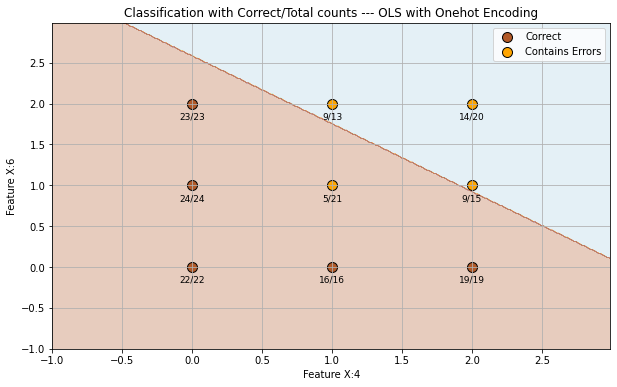

The accuracy is: 0.82

The classification report based on selected feature pair:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        48
           1       0.87      0.87      0.87       125

    accuracy                           0.82       173
   macro avg       0.77      0.77      0.77       173
weighted avg       0.82      0.82      0.82       173


The f1 score based on selected feature pair: 0.87


In [19]:
# Fit ordinary linear regression using selected feature pair
ols_subset = LinearRegression()
ols_subset.fit(X_train_val[:, [3, 5]], y_train_val)

# Visualize decision boundary using the same feature subset
draw_classification_onehot(X_test, y_test, ols_subset, 3, 5)

# Evaluate on test set (same feature pair)
y_pred_test_subset_ols = ols_subset.predict(X_test[:, [3, 5]])
y_pred_test_subset_ols = np.argmax(y_pred_test_subset_ols, axis=1)

# Report accuracy and classification metrics
accuracy_score_subset_ols = accuracy_score(y_test_label, y_pred_test_subset_ols)
print("The accuracy is:", round(accuracy_score_subset_ols, 2))

# Classification Report
cr_subset_ols = classification_report(y_test_label, y_pred_test_subset_ols)
print("\nThe classification report based on selected feature pair:\n", cr_subset_ols)

# F1 Score (Harmonic mean of precision and recall)
f1_ols = f1_score(y_test_label, y_pred_test_subset_ols,average='binary')
print("\nThe f1 score based on selected feature pair:", round(f1_ols,2))

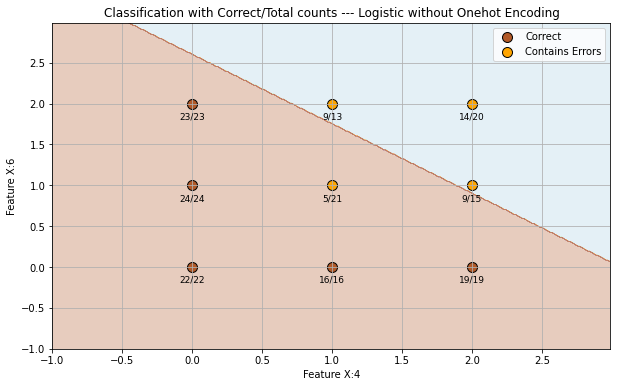

The accuracy is: 0.82

The classification report based on selected feature pair:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        48
           1       0.87      0.87      0.87       125

    accuracy                           0.82       173
   macro avg       0.77      0.77      0.77       173
weighted avg       0.82      0.82      0.82       173


The f1 score based on selected feature pair: 0.87


In [20]:
# Fit logistic regression using selected feature pair
lrm_subset = LogisticRegression()
lrm_subset.fit(X_train_val[:, [3, 5]], y_train_val_label)

# Visualize decision boundary using the same feature subset
draw_classification(X_test, y_test_label, lrm_subset, 3, 5)

# Evaluate on test set (same feature pair)
y_pred_test_subset_logistic = lrm_subset.predict(X_test[:, [3, 5]])

# Report accuracy and classification metrics
accuracy_score_subset = accuracy_score(y_test_label, y_pred_test_subset_logistic)
print("The accuracy is:", round(accuracy_score_subset, 2))

# Classification Report
cr_subset = classification_report(y_test_label, y_pred_test_subset_logistic)
print("\nThe classification report based on selected feature pair:\n", cr_subset)

# F1 Score (Harmonic mean of precision and recall) 
f1_logistic = f1_score(y_test_label, y_pred_test_subset_logistic, average='binary')
print("\nThe f1 score based on selected feature pair:", round(f1_logistic,2))

The figures above present the classification results across a 2D feature space defined by Feature $X_4$ and Feature $X_6$. Each marker represents a distinct data point location, with labels indicating the number of correct classifications out of the total observations at that location (e.g., “23/23” means all 23 samples at that location were classified correctly).  As we can see, with the selected feature pair: $X_4$ (**Persons**) and $X_6$ (**Safety**) these two figures are identical meaning that the classification performance of using ordinary linear regression with onehot-encoded labels is as good as using the conventional logistic regression.

Two types of markers are used:
- **Orange markers** represent locations where the classifier made some errors (e.g., "5/21").
- **Brown markers** indicate perfect classification at that location (e.g., "22/22").

The classification accuracy is computed as:

$$
\text{Accuracy} = \frac{\sum_{i=1}^{n} c_i}{\sum_{i=1}^{n} t_i} = \frac{141}{173} \approx 0.82
$$

where $c_i$ is the number of correctly classified samples and $t_i$ is the total number of samples at location $i$, with $n$ being the total number of distinct data point locations.
This result aligns with the accuracy reported in the classification summary.


What we have obtained so far:

Summary of Metrics - Ordinary Linear Regression with onehot-encoded labels  v.s. Logistic Regression without onehot-encoded labels

| Model                | Accuracy | Precision | Recall | F1 Score |
|----------------------|----------|-----------|--------|----------|
| Linear Regression - Onehot   | 0.83     | 0.82     | 0.83   | 0.88     |
| Logistic Regression - Without Onehot | 0.83     | 0.83      | 0.83   | 0.89     |
| Linear Regression - Onehot 2D       | 0.82     | 0.82      | 0.82   | 0.87     |
| Logistic Regression - Without Onehot 2D       | 0.82     | 0.82      | 0.82   | 0.87     |

###### Note: The Metrics above are weighted average values and F1 score is the harmonic mean of Precision and Recall. 

#### 3.5  Discussion

3.5.1 Performance Comparison

Based on the results in the table above, the ordinary linear regression with one-hot encoding and logistic regression without one-hot encoding, each evaluated with both full and 2D feature sets—demonstrate strong and consistent performance, with accuracy ranging from 0.82 to 0.83. Logistic regression without one-hot encoding achieves the highest F1 score of 0.89, slightly outperforming linear regression (0.88). Both models maintain balanced precision and recall (determined by their harmonic mean based F1 score), especially when using the full feature set, and the value drops only marginally when reduced to two features (F1 drops from 0.88–0.89 to 0.87). This indicates that the selected feature pair by the best subset selection: $X_4$ (**Persons**) and $X_6$ (**Safety**) retain significant predictive power. Overall, the performance of ordinary linear regression with one-hot encoded labels is on par with that of logistic regression, a traditional classifier for binary classification problems.

3.5.2 Rationale Behind the Results

The nearly identical performance between ordinary linear regression (OLS) (with one-hot encoded labels) and logistic regression is due to the binary nature of the classification task in this dataset. In binary classification, the decision boundary is relatively simple—models only need to separate two classes—which allows both linear and logistic regression to perform similarly well, particularly when the features are informative and the classes are linearly separable. One-hot encoding ensures that linear regression does not misinterpret any ordinal relationship between class labels, while logistic regression inherently handles ordinal labels effectively in binary settings. Additionally, both models were able to learn similar linear decision boundaries, as observed in the earlier 2D visualization. It is also worth noting that the argmax operation applied to the output of linear regression, $\hat{c} = \arg\max_{k \in \{0, 1\}} \hat{y}_k$, closely mimics the thresholding behavior of logistic regression when limited to two output dimensions. However, this equivalence tends to break down in multi-class problems, where using a softmax-based classifier is generally more appropriate for performance comparison with the OLS with one-hot encoded labels.


#### 4. Further Model Exploration

##### 4.1 Support Vector Machine (SVM) Classifier:

Support Vector Machine (SVM) [4], a popular supervised learning model for classification problems, which is covered in Module 8 of this course, aims to find the optimal hyperplane that separates data points from different classes with the maximum possible margin. In the case of linearly separable data, SVM constructs a linear decision boundary defined by a subset of training points called support vectors. For non-linearly separable problems, SVM can incorporate kernel functions to map data into a higher-dimensional space where a linear separation becomes feasible. This makes SVM highly effective for classification tasks, particularly when the dataset is high-dimensional or the boundary between classes is complex.

In [21]:
# Let's try another supervised learning model: SVM and check if the performance metrics are any different

# Convert one-hot encoded labels back to class indices
y_train_label = np.argmax(y_train, axis=1)
y_val_label = np.argmax(y_val, axis=1)

# Import the SVM classifier
from sklearn.svm import SVC

# Set regularization strength (C) and initialize linear SVM
lam = 1 # Let's start with 1 and see what we can get to determine our search space for this hyperparameter. 
svm_classifier = SVC(kernel='linear', C=lam, random_state=21)

# Train the SVM model on the training set
svm_classifier.fit(X_train, y_train_label)

# Predict on the validation set
y_pred_val_svm = svm_classifier.predict(X_val)

# Evaluate validation accuracy
accuracy_val_svm = accuracy_score(y_val_label, y_pred_val_svm)

# Display the result with two decimal places
print("Validation Accuracy based on SVM:", np.round(accuracy_val_svm, 2))


Validation Accuracy based on SVM: 0.88


Let's search for the optimal regularization parameter $C$ — a hyperparameter that controls the size of slack variables —in order to achieve the highest classification accuracy.

A large $C$ -> the model strongly penalizes misclassifications or margin violations -> A more complex Model 

A small $C$ -> the model is more tolerant of misclassified or margin-violating points -> A simpler Model



In [22]:
# Define a range of lambda values to search for the best regularization strength
lam_values = np.linspace(0.1, 1.5, 30)
accuracy_list = []

# Iterate over each C value and record validation accuracy
for lam in lam_values:
    svm_classifier = SVC(kernel='linear', C=lam, random_state=22)
    svm_classifier.fit(X_train, y_train_label)
    y_pred_val_svm = svm_classifier.predict(X_val)
    accuracy_val_svm = accuracy_score(y_val_label, y_pred_val_svm)
    accuracy_list.append(accuracy_val_svm)

# Identify the C value that gives the highest validation accuracy
best_lam_value = lam_values[np.argmax(accuracy_list)]

# Show the best C (lambda) value
print("The best lambda based on the highest validation accuracy is:", np.round(best_lam_value, 2))

The best lambda based on the highest validation accuracy is: 0.24


Let's plot the validation accuracies versus hyperparameters.

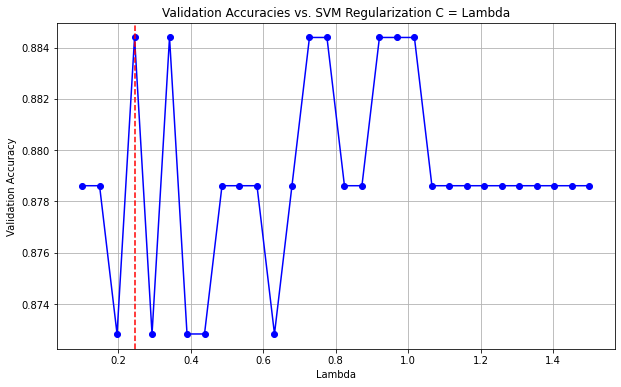

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(lam_values, accuracy_list, marker='o', linestyle='-', color='blue')
plt.axvline(x=best_lam_value, color='r', linestyle='--', label='Best Lambda')
plt.title('Validation Accuracies vs. SVM Regularization C = Lambda')
plt.xlabel('Lambda')
plt.ylabel('Validation Accuracy')
plt.grid(True)

As we can see in the plot above,  it looks like there are 7 equal lambda values. Let's see if that's true.  

In [24]:
# Sort index according to the accuracy values in a decending order. 

sorted_indices_accuracy = np.argsort(accuracy_list)[::-1]

for i in sorted_indices_accuracy[:7]:
    print(f'\nthe index {i} accuracy is:', np.round(accuracy_list[i], 2))
    print("Its lambda is:", np.round(lam_values[i],2))


the index 14 accuracy is: 0.88
Its lambda is: 0.78

the index 3 accuracy is: 0.88
Its lambda is: 0.24

the index 5 accuracy is: 0.88
Its lambda is: 0.34

the index 13 accuracy is: 0.88
Its lambda is: 0.73

the index 19 accuracy is: 0.88
Its lambda is: 1.02

the index 18 accuracy is: 0.88
Its lambda is: 0.97

the index 17 accuracy is: 0.88
Its lambda is: 0.92


All seven lambda values yield the same validation accuracy. 

Therefore, we will evaluate the performance on the test set for all of them. 

In [25]:
# Save all the lambda values into a new list
new_lam_list = lam_values[sorted_indices_accuracy[:7]]

print(new_lam_list)

[0.77586207 0.24482759 0.34137931 0.72758621 1.01724138 0.96896552
 0.92068966]


In [26]:
# Evaluate SVM performance on the test set using selected lambda values
for lam in new_lam_list:

    # Train the SVM classifier on the combined training and validation set
    svm_classifier_test = SVC(kernel='linear', C=lam, random_state=24)
    svm_classifier_test.fit(X_train_val, y_train_val_label)

    # Predict labels for the test set
    y_pred_test_svm = svm_classifier_test.predict(X_test)

    # Compute and print the test accuracy
    accuracy_test_svm = accuracy_score(y_test_label, y_pred_test_svm)
    print(f'With C = {np.round(lam, 2)}, the test accuracy of the SVM classifier is:', np.round(accuracy_test_svm, 2))



With C = 0.78, the test accuracy of the SVM classifier is: 0.83
With C = 0.24, the test accuracy of the SVM classifier is: 0.83
With C = 0.34, the test accuracy of the SVM classifier is: 0.83
With C = 0.73, the test accuracy of the SVM classifier is: 0.83
With C = 1.02, the test accuracy of the SVM classifier is: 0.83
With C = 0.97, the test accuracy of the SVM classifier is: 0.83
With C = 0.92, the test accuracy of the SVM classifier is: 0.83


In [27]:
# Let's check other metrics by the classification report:

# Train the SVM classifier on the combined training and validation set with the best lambda value
svm_classifier_final = SVC(kernel='linear', C=best_lam_value, random_state=25)
svm_classifier_final.fit(X_train_val, y_train_val_label)

# Predict labels for the test set
y_pred_test_final = svm_classifier_final.predict(X_test)

# Print the classification report
cr_test_svm = classification_report(y_test_label, y_pred_test_final)
print("\nThe classification report of applying SVM to this classification problem:\n", cr_test_svm)

# Get the harmonic mean based F1 Score:
f1_svm = f1_score(y_test_label, y_pred_test_final, average='binary')
print("\nThe f1 score of applying SVM to this classification problem:", round(f1_svm,2))


The classification report of applying SVM to this classification problem:
               precision    recall  f1-score   support

           0       0.71      0.62      0.67        48
           1       0.86      0.90      0.88       125

    accuracy                           0.83       173
   macro avg       0.79      0.76      0.77       173
weighted avg       0.82      0.83      0.82       173


The f1 score of applying SVM to this classification problem: 0.88


The results show that across all selected values of the hyperparameter (i.e., the inverse of regularization strength: 𝐶 in the SVM model), the test accuracy remains consistently at 0.83. This consistency suggests that the model is already performing at its capacity for this classification task and that further tuning of 𝐶 within this range has little to no impact on generalization performance. So far, all three models we tried (i.e. Linear Regression with one-hot encoded labels, Logistic Regression and SVM Classifier) have all achieved the same testing accuracy, 83%.

Now, the question is: can we do better than that? Given time constraints, I will now briefly explore a well-known ensemble model: the Random Forest classifier.

##### 4.2 Random Forest Classifier:

Random Forest [3] is an ensemble learning algorithm, also covered in Module 9, which builds a collection of decision trees and combines their outputs to improve prediction accuracy and robustness. Each tree is trained on a random subset of the training data (bagging), and at each split, it considers a random subset of features to reduce correlation among trees. For classification tasks, the final prediction is made by majority voting across all trees in the forest. This ensemble approach helps mitigate overfitting and improves generalization compared to individual decision trees. Let's see if an ensemble model can outperform those $'individual'$ models discussed previously for this binary classification problem.


In [28]:
# Let's explore another well-known algorithm for the classification problem
from sklearn.ensemble import RandomForestClassifier

# Define a range of values for the number of trees to test
number_of_trees = np.linspace(1, 100, 100)

# List to store validation accuracy for each number of trees
accuracy_list = []

# Iterate through each candidate number of trees
for num in number_of_trees:

    # Initialize and train the Random Forest classifier
    rfc = RandomForestClassifier(n_estimators=int(num), random_state=20)
    rfc.fit(X_train, y_train_label)

    # Predict on the validation set
    y_val_pred_rfc = rfc.predict(X_val)

    # Evaluate and store the validation accuracy
    accuracy_rfc_val = accuracy_score(y_val_label, y_val_pred_rfc)
    accuracy_list.append(accuracy_rfc_val)

# Identify the number of trees that gave the highest validation accuracy
best_number = int(number_of_trees[np.argmax(accuracy_list)])

# Display the best-performing number of trees
print("The number of trees used corresponding to the highest validation accuracy is:", best_number)


The number of trees used corresponding to the highest validation accuracy is: 16


Fit the model with the optimal number of trees on the test set. 

In [29]:
# Test the random forest classifier with the optimal number of trees

# Initialize the model with the best number of trees and retrain the model on the full training+validation set
rfc_final = RandomForestClassifier(n_estimators=best_number, random_state=21)
rfc_final.fit(X_train_val, y_train_val_label)

# Predict class labels for the test set
y_test_pred_rfc = rfc_final.predict(X_test)

# Evaluate and print the test set accuracy
accuracy_rfc_test = accuracy_score(y_test_label, y_test_pred_rfc)
print(accuracy_rfc_test)

# Print the classification report
cr_test_rfc = classification_report(y_test_label, y_test_pred_rfc)
print("\nThe classification report of applying random forest to this classification problem:\n", cr_test_rfc)

# Get the harmonic mean based F1 Score:
f1_rfc = f1_score(y_test_label, y_test_pred_rfc, average='binary')
print("\nThe f1 score of applying random forest to this classification problem:", round(f1_rfc,2))

1.0

The classification report of applying random forest to this classification problem:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00       125

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173


The f1 score of applying random forest to this classification problem: 1.0


------------------------------------Summary of Performance-----------------------------------

| Model                                   | Accuracy | Precision | Recall | F1 Score |
|-----------------------------------------|----------|-----------|--------|----------|
| Linear Regression - Onehot              | 0.83     | 0.82      | 0.83   | 0.88     |
| Logistic Regression - Without Onehot    | 0.83     | 0.83      | 0.83   | 0.89     |
| Linear Regression - Onehot 2D           | 0.82     | 0.82      | 0.82   | 0.87     |
| Logistic Regression - Without Onehot 2D | 0.82     | 0.82      | 0.82   | 0.87     |
| SVM Classifier - Without Onehot         | 0.83     | 0.82      | 0.83   | 0.88     |
| Random Forest - Without Onehot          | 1.00     | 1.00      | 1.00   | 1.00     |

##### 4.3 Comparison with Previous Models:


Looking at the results, the Random Forest classifier clearly outperforms all other models, achieving a perfect test score: 100% test accuracy. This is a big jump compared to the earlier models like Linear Regression, Logistic Regression, and SVM, all of which topped out at 83% accuracy.

The SVM classifier did just as well as linear regression with one-hot encoded labels and logistic regression, which tells us that the problem might already be well-suited to linear models — and that both models have found similar or same decision boundaries. But even though they’re doing fine, they’re still limited by the fact that they only look for linear splits.

Random Forest, on the other hand, doesn’t rely on linear assumptions. Since it's made up of many decision trees (16 in our case), it’s really good at capturing more complex patterns and interactions between features. It trains different trees on random subsets of the data and features, then combines their predictions — this helps it generalize better and avoid overfitting. Based on the results here, it seems like Random Forest was able to pick up on structure in the data that the simpler models missed.

#### 5. Final Summary


In this project, different models have been performed on a binary classification task using the Car Evaluation dataset. Starting with a linear regression model using one-hot encoded labels as required by the project instruction, we compared its performance with logistic regression (with ordinal labels). Also, later we did a bit more exploration on SVM and Random Forest classifier. The linear models—including SVM—all achieved similar test accuracy of around 83%, suggesting that the dataset is relatively straightforward and linearly separable. The goal of getting an testing accuracy higher than 60% has been achieved. However, when we introduced Random Forest, an ensemble method that captures more complex, non-linear patterns, the performance jumped to 100% across all evaluation metrics. This highlights how ensemble models like Random Forest can uncover deeper structure in the data that linear models might miss. While the simpler models provide solid baselines and are easier to interpret, Random Forest clearly outperformed them in this case and demonstrates the value of trying more powerful methods when accuracy needs to be improved.

One challenge in this project was to ensure that the dataset was properly preprocessed and encoded in a way that suited the models being used. The original dataset contained categorical variables, both as features and as labels, which required different transformation techniques. For the linear regression model, the target labels had to be one-hot encoded to fulfill the project requirement. To achieve this, the categorical labels ('P' or 'N') had to be first encoded into numerical format ('1' or '0') before being encoded again into a one-hot encoded $𝑁 \times 2$ array. This added some complexity to the data pre-processing, as well as to interpreting the predictions, since we had to apply argmax to the output vector to determine the predicted class.

#### 6. Recommendation

There are several directions worth exploring to build on the findings of this project. First, it would be valuable to extend the one-hot encoding approach to a multi-class classification setting and compare the performance of linear regression against a model designed specifically for multi-class problems, such as softmax regression. This would help evaluate whether the gap between regression-based and classification-specific models could vary with more classes. Second, while we only attempted linear kernel in this project, it would be interesting to investigate the effect of using non-linear kernels (e.g., RBF or polynomial) to capture more complex decision boundaries and potentially improve performance. Finally, although the Random Forest classifier outperformed all other models in this binary task, it would be worthwhile to explore whether more interpretable models, perhaps with the help of feature parameter tunnings such as using different kernels in SVM classifier can achieve comparable performance. 

### References

[1] S. Jamshidi, *Module 3, Lesson 1: Linear Regression and the Indicator Matrix*, MATH 569: Statistical Learning, Illinois Institute of Technology, lecture notes.

[2] S. Jamshidi, *Module 3, Lesson 3: Logistic Regression*, MATH 569: Statistical Learning, Illinois Institute of Technology, lecture notes.

[3] S. Jamshidi, *Module 8, Lesson 1: Tree Models*, MATH 569: Statistical Learning, Illinois Institute of Technology, lecture notes.

[4] S. Jamshidi, *Module 9, Lesson 8: Support Vector Machines*, MATH 569: Statistical Learning, Illinois Institute of Technology, lecture notes.

